In [367]:
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib
import matplotlib.pyplot as plt


In [75]:
data = pd.read_csv(r"C:\Users\ramcb\Downloads\movies.csv")

df_data = data.copy()

In [77]:
# df_data.head()
# df_data.tail()
# df_data.shape
# df_data.columns
# df_data.isna()
# print(df_data.info())

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [179]:
"""checking or identifying whether there is missing value or null value in data in %"""
for col in df_data.columns:
    pct_empty_values = np.mean(df_data[col].isna())
    print("{}-{}%".format(col,pct_empty_values*100))
"""Checking whether the rows has null values using isna()"""
df_data.isna()
null_indices = df_data[df_data.isnull().any(axis=1)].index.tolist()
# print(null_indices)
print(len(null_indices))
"""Identifying the index values of the null values"""
# for idx in null_indices:
#     index = idx
#     print(df_data.loc[index])
# df_data.iloc[16]

name-0.0%
rating-1.004173187271779%
genre-0.0%
year-0.0%
released-0.02608242044861763%
score-0.03912363067292645%
votes-0.03912363067292645%
director-0.0%
writer-0.03912363067292645%
star-0.013041210224308816%
country-0.03912363067292645%
budget-28.31246739697444%
gross-2.464788732394366%
company-0.2217005738132499%
runtime-0.05216484089723526%
2247


'Identifying the index values of the null values'

In [171]:
"""filtering where both and gross and budget has nan values """
len_null_indices = []
for idx in null_indices:
    index = idx
    if np.isnan(df_data.loc[index, 'budget']) and np.isnan(df_data.loc[index, 'gross']):
        # print(df_data.loc[index])
        # print(idx)
        len_null_indices.append(idx)
print(len(len_null_indices))

128


In [149]:
df_data.loc[41]
df_data.shape

(7668, 15)

In [187]:
cleaned_df_data = df_data.dropna(subset=['budget','gross'], how='all')

In [189]:
cleaned_df_data.shape

(7540, 15)

In [205]:
"""A simple verification"""
print(cleaned_df_data[['budget', 'gross']].isna().all(axis=1).sum())
print(cleaned_df_data.isna().any(axis=1).sum())

0
2119


In [213]:
cleaned_df_data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [233]:
print(cleaned_df_data.isna().any(axis=1).sum())
# cleaned_df_data['budget'] = cleaned_df_data['budget'].astype('int64')

76


In [239]:
cleaned_df_data.loc[:, ['budget', 'gross']] = cleaned_df_data.loc[:, ['budget', 'gross']].fillna(0).astype('int64')

cleaned_df_data.head()
# cleaned_df_data.dtypes


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [243]:
for col in cleaned_df_data.columns:
    pct_empty_values = np.mean(cleaned_df_data[col].isna())
    print("{}-{}%".format(col,pct_empty_values*100))

name-0.0%
rating-0.8222811671087533%
genre-0.0%
year-0.0%
released-0.0%
score-0.03978779840848806%
votes-0.03978779840848806%
director-0.0%
writer-0.03978779840848806%
star-0.01326259946949602%
country-0.01326259946949602%
budget-0.0%
gross-0.0%
company-0.1856763925729443%
runtime-0.02652519893899204%


In [303]:
cleaned_df_data = cleaned_df_data.fillna({'int64': 0, 'float64': 0.0, 'object': ''})

numeric_cols = cleaned_df_data.select_dtypes(include=['int64','float64']).columns
cleaned_df_data[numeric_cols] = cleaned_df_data[numeric_cols].fillna(0)

object_cols = cleaned_df_data.select_dtypes(include=['object']).columns
cleaned_df_data[object_cols] = cleaned_df_data[object_cols].fillna('')


In [305]:
print(cleaned_df_data.isna().any(axis=1).sum())

0


In [391]:
cleaned_df_data.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
correct_year     object
dtype: object

In [279]:
"""Coorecting the year column with respect to released year """

cleaned_df_data['correct_year'] = cleaned_df_data['released'].astype(str).str.split(',').str[1].str.split('(').str[0].str.strip()


In [283]:
# cleaned_df_data.info


In [369]:
# cleaned_df_data.sort_values(by=['gross'], inplace=False, ascending=False)

In [311]:
pd.set_option('display.max_rows', None)

In [357]:
# cleaned_df_data.sort_values(by=['gross'], inplace=False, ascending=False)

In [327]:
"""checking and removing duplicates"""
cleaned_df_data.duplicated().sum()
cleaned_df_data = cleaned_df_data.drop_duplicates().sort_values(by=['gross'], ascending=False)


In [395]:
cleaned_df_data = cleaned_df_data.sort_values(by=['gross'], inplace=False, ascending=False)

In [393]:
 # cleaned_df_data

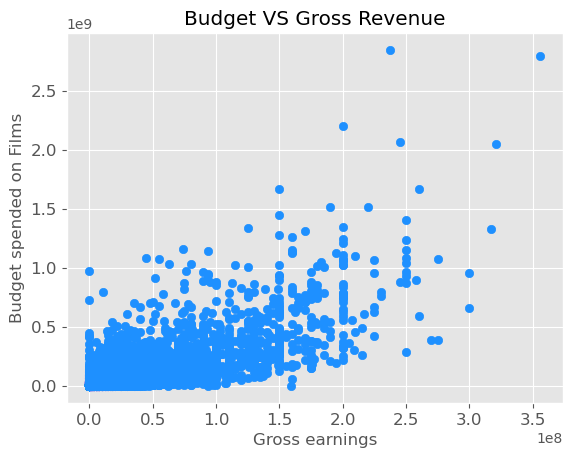

<Figure size 1200x800 with 0 Axes>

In [361]:
plt.scatter(x=cleaned_df_data['budget'], y=cleaned_df_data['gross'], c='dodgerblue')
plt.title('Budget VS Gross Revenue')
plt.xlabel('Gross earnings')
plt.ylabel('Budget spended on Films')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

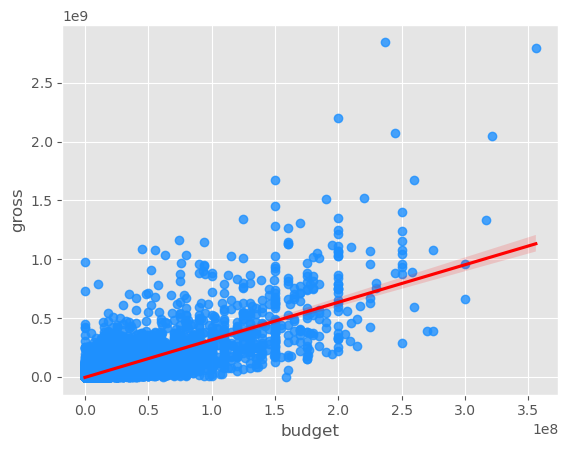

In [381]:
sns.regplot(x='budget',y='gross',data=cleaned_df_data, scatter_kws ={'color':'dodgerblue'}, line_kws={'color':'red'})

In [403]:
correlation_matrix = cleaned_df_data.select_dtypes(include=['int64', 'float64']).corr(method='pearson') #pearson ,kendall,spearman

print(correlation_matrix)


             year     score     votes    budget     gross   runtime
year     1.000000  0.089500  0.216974  0.303384  0.258046  0.113617
score    0.089500  1.000000  0.410083  0.055333  0.186603  0.394691
votes    0.216974  0.410083  1.000000  0.484140  0.631447  0.308942
budget   0.303384  0.055333  0.484140  1.000000  0.749085  0.268333
gross    0.258046  0.186603  0.631447  0.749085  1.000000  0.244872
runtime  0.113617  0.394691  0.308942  0.268333  0.244872  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

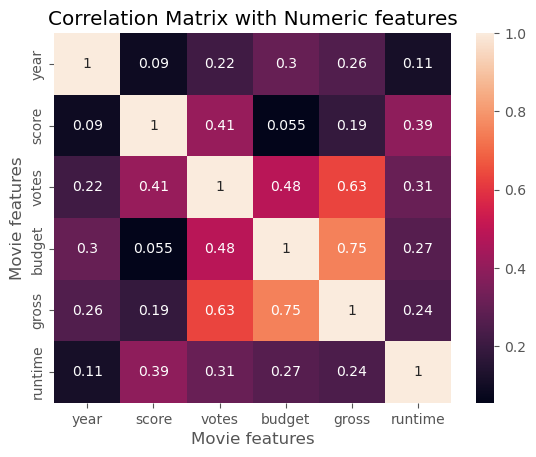

In [407]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix with Numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show

In [443]:
"""Converting the object dtypes of the company to find out correlation of budget and gross from a single production company"""

cleaned_df_data_num = cleaned_df_data

for x in cleaned_df_data_num.columns:
    if (cleaned_df_data_num[x].dtypes == 'object'):
        cleaned_df_data_num[x] = cleaned_df_data_num[x].astype('category')
        cleaned_df_data_num[x] = cleaned_df_data_num[x].cat.codes

# cleaned_df_data_num

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

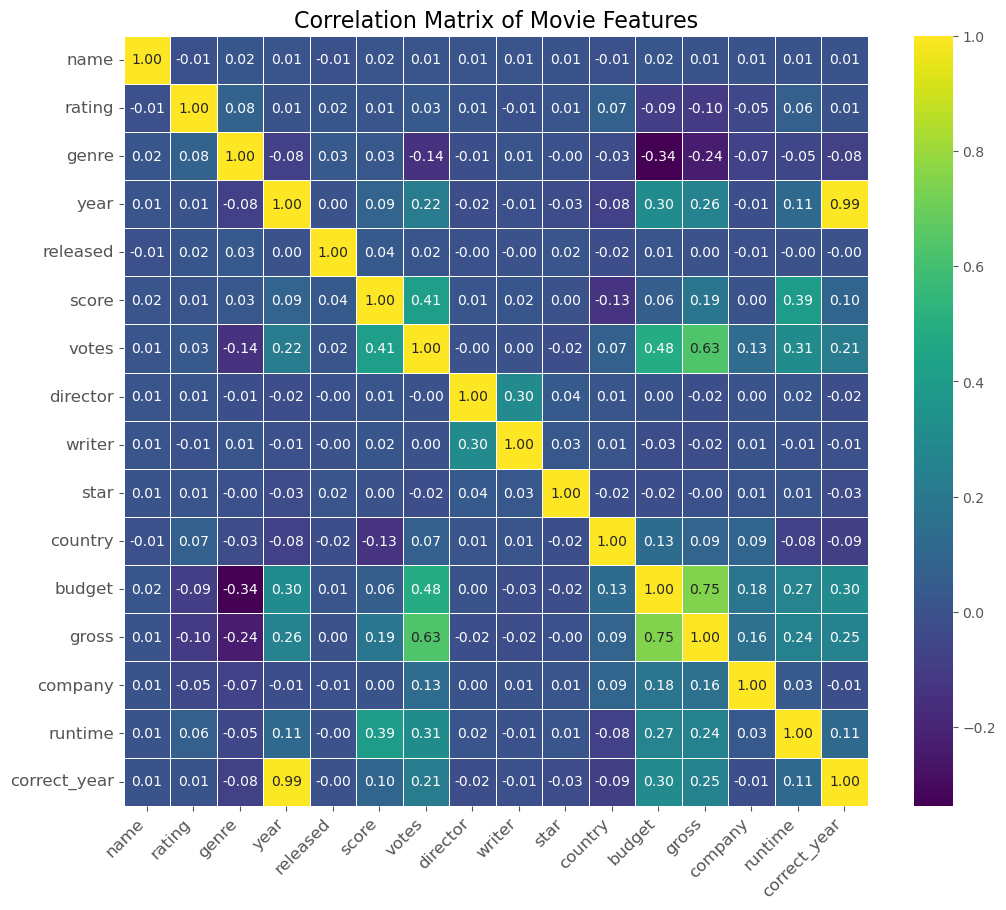

In [429]:
"""Using pearson corr method we are trying to findout the correlation between all the data in the column"""
correlation_num_matrix = cleaned_df_data_num.corr(method='pearson')
plt.figure(figsize=(12, 10))  # Adjust figure size for better readability
sns.heatmap(correlation_num_matrix, annot=True, fmt=".2f", linewidths=.5, cmap="viridis")
plt.title('Correlation Matrix of Movie Features', fontsize=16)  # Add a clear title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(rotation=0, fontsize=12)  # Ensure y-axis labels are horizontal
plt.colorbar(label='Correlation Coefficient')  # Label the color bar
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

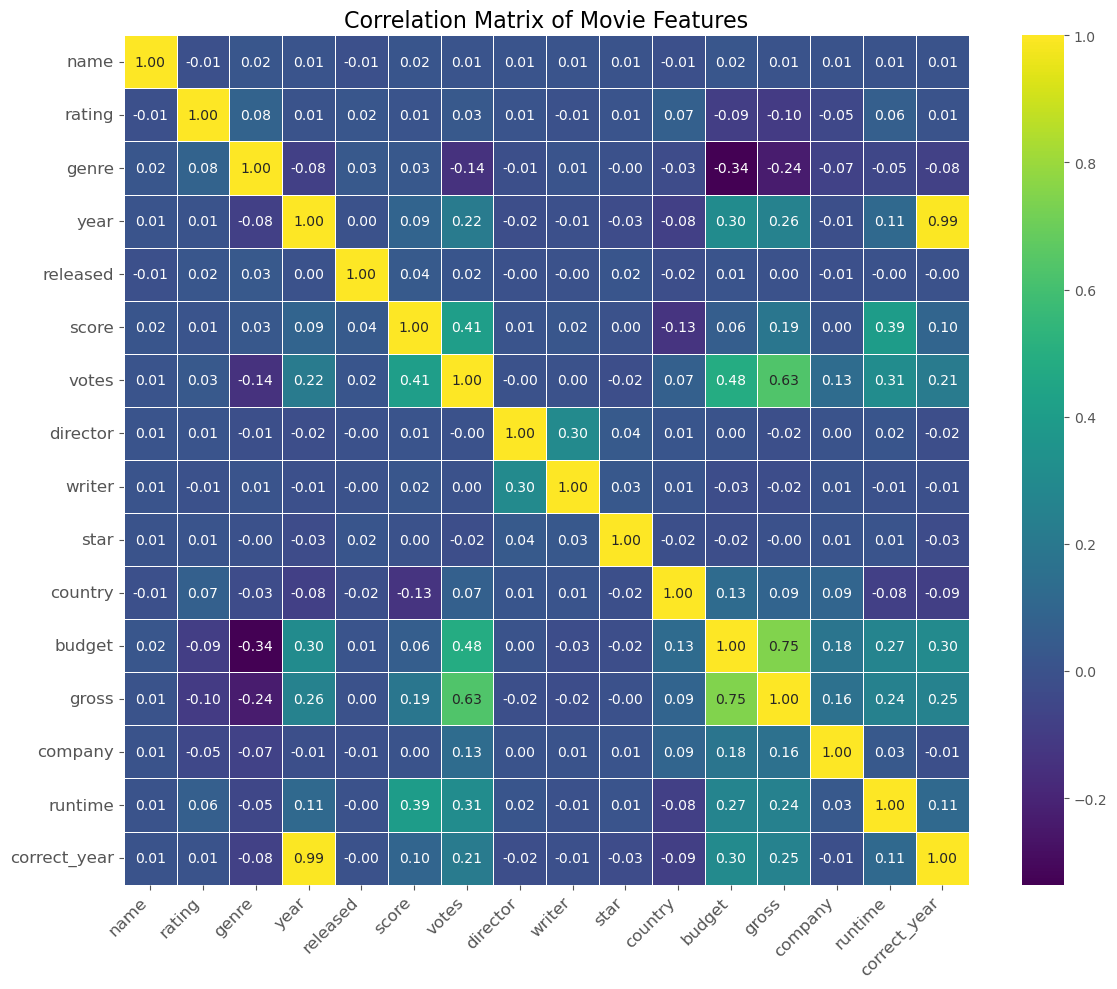

In [431]:
"""This is the same as the previous one except the previous one causes the runtime error with the output because of the data """
fig, ax = plt.subplots(figsize=(12, 10))  # Create figure and axes

sns.heatmap(correlation_num_matrix, annot=True, fmt=".2f", linewidths=.5, cmap="viridis", ax=ax) # Pass ax to heatmap

ax.set_title('Correlation Matrix of Movie Features', fontsize=16)  # Set title on the axes
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12) # Set tick labels on the axes
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12) # Set tick labels on the axes
fig.tight_layout() # Use fig.tight_layout()
plt.show()


In [445]:
"""Since the correleation is clusterd and stacked which isnt clear for vizual we are gonna do unstacking and sorting the 
values to get clear output"""

corr_num_matrix = cleaned_df_data_num.corr()
corr_sets = corr_num_matrix.unstack()
# corr_sets

In [441]:
sorted_corr_sets = corr_sets.sort_values()
sorted_corr_sets

high_corr_sets = sorted_corr_sets[(sorted_corr_sets)>0.5]
high_corr_sets

gross         votes           0.631447
votes         gross           0.631447
budget        gross           0.749085
gross         budget          0.749085
year          correct_year    0.993352
correct_year  year            0.993352
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

In [ ]:
"""The final comment - production Budget and peoples votes has high correlation with Gross revenue it doesnt matter which
production company(i.e production company doesnt have correlation with gross revenue)"""
"""When the number of votes increases the gross increases"""
"""The higher the budget of the film the higher the gross revenue"""